In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import preprocessing

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from skimage.transform import resize
from skimage.io import imread

# for creating validation set
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CafeBazar_Posters2/train_set.csv')

dataset = dataset.apply(lambda x : x.str.lstrip())
dataset.replace('', np.nan, inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         11000 non-null  object
 1   title_fa         11000 non-null  object
 2   description_fa   8559 non-null   object
 3   age_rating       8007 non-null   object
 4   country_fa       10882 non-null  object
 5   production_year  10998 non-null  object
 6   duration         10129 non-null  object
 7   genre            11000 non-null  object
 8   image            11000 non-null  object
dtypes: object(9)
memory usage: 773.6+ KB


In [ ]:
train_x = []
train_y = []
for img_name in tqdm(range(len(dataset['image']))):

  image_path = '/content/drive/MyDrive/CafeBazar_Posters2/train_set/' + str(dataset['image'][img_name])
  img = imread(image_path)

  if img.shape != (340,300,3):
    continue
  train_x.append(img)
  train_y.append(dataset['genre'][img_name])

# train_image = np.array(train_x_x)

100%|██████████| 11000/11000 [01:33<00:00, 117.70it/s]


In [ ]:
len(train_x), len(train_y)

(8318, 8318)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5e07569518>,
 <matplotlib.image.AxesImage at 0x7f5e074c5cc0>)

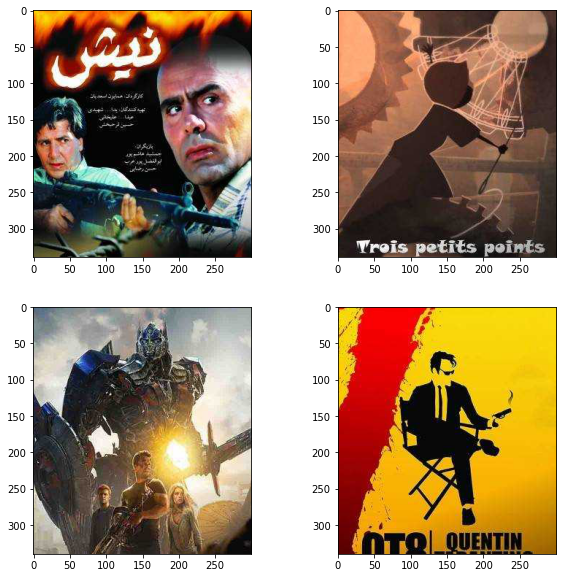

In [ ]:
# visualizing images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i])
plt.subplot(222), plt.imshow(train_x[i+25])
plt.subplot(223), plt.imshow(train_x[i+50])
plt.subplot(224), plt.imshow(train_x[i+75])

In [ ]:

le = preprocessing.LabelEncoder()
train_y = le.fit_transform(train_y)
train_y = np.array(train_y)

In [ ]:
# one hot encode output variable
from keras.utils import to_categorical
targets = to_categorical(train_y)
targets

In [ ]:
from skimage.measure import block_reduce
block_reduce(image, block_size=(3, 3, 1), func=np.mean)

In [ ]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

SIZE = (340, 300, 3)
model = Sequential()

model.add(Input(shape=SIZE))
# model.add(Reshape(SIZE, input_shape=(None, None, 3)))

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(SIZE[0], SIZE[1], 3)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', strides=2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# model.add(Conv2D(1, kernel_size=(3, 3), activation='softmax', padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 340, 300, 128)     3584      
_________________________________________________________________
batch_normalization_4 (Batch (None, 340, 300, 128)     512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 340, 300, 128)     147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 340, 300, 128)     512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 170, 150, 128)     0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 170, 150, 128)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 170, 150, 64)     

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
# history = model.fit(np.array(X), y, batch_size=16, epochs=5, verbose=1, validation_split=0.1)
# history = model.fit(np.array(train_x), targets, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
history = model.fit(imageLoader(train_x, targets, 4), steps_per_epoch=50, epochs=5, verbose=1)

Epoch 1/5
468/468 [==============================] - 768s 2s/step - loss: 97.8148 - accuracy: 0.1824 - val_loss: 2.1276 - val_accuracy: 0.2320
Epoch 2/5
468/468 [==============================] - 766s 2s/step - loss: 2.1314 - accuracy: 0.2388 - val_loss: 2.1227 - val_accuracy: 0.2320
Epoch 3/5
468/468 [==============================] - 766s 2s/step - loss: 2.1254 - accuracy: 0.2382 - val_loss: 2.1220 - val_accuracy: 0.2320
Epoch 4/5
289/468 [=================>............] - ETA: 4:45 - loss: 2.1339 - accuracy: 0.2315

KeyboardInterrupt: ignored

In [ ]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

{'accuracy': [0.10000000149011612,
  0.0,
  0.0,
  0.10000000149011612,
  0.10000000149011612],
 'loss': [0.0, 0.0, 0.0, 0.0, 0.0]}